# **1. Introduction**

**Why Machine Learning in Finance?**  
Machine learning (ML) has become a cornerstone of modern financial analysis due to its ability to uncover complex patterns in vast, noisy datasets. Traditional statistical methods often fall short when dealing with high-dimensional, non-linear relationships inherent in financial markets. ML excels in areas such as:  

- **Algorithmic Trading:** Predicting price movements, optimizing execution strategies, and detecting arbitrage opportunities using models like Random Forests and LSTMs.  
- **Risk Management:** Estimating credit risk (e.g., logistic regression for default prediction), market risk (VaR models), and operational risk (fraud detection).  
- **Fraud Detection:** Identifying anomalous transactions via unsupervised methods (e.g., k-means clustering, autoencoders).  
- **Portfolio Management:** Asset allocation using reinforcement learning or clustering to group correlated instruments.  
- **Customer Analytics:** Segmenting clients (unsupervised learning) or predicting churn (supervised learning).  

**Supervised vs. Unsupervised Learning**

- **Supervised Learning** (Prediction):  
  - Uses labeled data (e.g., historical stock prices → future returns).  
  - *Financial examples:* Credit scoring (logistic regression), stock return forecasting (linear regression), and option pricing (neural networks).  
- **Unsupervised Learning** (Pattern Discovery):  
  - Works with unlabeled data to find hidden structures.  
  - *Financial examples:* Customer segmentation (k-means), dimensionality reduction for risk factors (PCA), and anomaly detection (isolation forests).  

**Key Challenges in Financial ML**  
1. **Non-Stationarity:** Financial data distributions change over time (e.g., market regimes). Models trained on past data may fail in new conditions.  
   - *Solution:* Rolling-window backtesting, adaptive models.  
2. **Noise and Low Signal-to-Noise Ratio:** Market data is noisy, and predictive signals are often weak.  
   - *Solution:* Feature engineering (e.g., lagged returns, volatility measures), ensemble methods.  
3. **Interpretability:** Regulatory and stakeholder demands for explainability (e.g., SHAP values for feature importance in credit decisions).  
   - *Trade-off:* Complex models (e.g., deep learning) vs. interpretable models (e.g., decision trees).  
4. **Overfitting:** High risk when models memorize noise instead of learning generalizable patterns.  
   - *Solution:* Regularization (Lasso/Ridge), cross-validation, and out-of-sample testing.  

# **2. Core Machine Learning Models**

#### **Supervised Learning Models**  
**1. Linear Regression**  
- **Basics:** Models the relationship between a dependent variable (e.g., stock return) and independent variables (e.g., macroeconomic factors) using a linear equation:  

$y = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n + \epsilon$

- **Financial Use Case:**  
  - **Factor models** (Fama-French factors) to explain asset returns.  
  - Predicting bond yields based on interest rates and inflation.  
- **Limitations:** Assumes linearity and struggles with multicollinearity.   

**2. Logistic Regression**  
- **Basics:** Predicts binary outcomes (e.g., default/no default) using the logistic function:  

$P(y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1)}}$

- **Financial Use Case:**  
  - **Credit scoring** (probability of loan default).  
  - **Fraud detection** (classifying transactions as fraudulent/legitimate).  
- **Advantage:** Highly interpretable (coefficients show feature impact).  

**3. Decision Trees**  
- **Basics:** Non-linear model that splits data into branches based on feature thresholds (e.g., "if P/E ratio < 15 → Buy").  
- **Financial Use Case:**  
  - **Trading rules generation** (interpretable "if-then" logic).  
  - **Client segmentation** (e.g., classifying high-risk investors).  
- **Pros:** No assumptions about data distribution; handles non-linearities.  
- **Cons:** Prone to overfitting (solved by ensembles like Random Forest).  

**4. Random Forest**  
- **Basics:** Ensemble of decision trees trained on random subsets of data/features (bootstrap aggregation).  
- **Financial Use Case:**  
  - **Feature importance** (identifying key drivers of stock returns).  
  - **High-frequency trading** (robust to noise due to averaging).  
- **Why Finance Loves It:** Handles non-linearity and provides interpretable feature rankings.  

**5. Gradient Boosting (XGBoost/LightGBM)**  
- **Basics:** Sequentially builds trees to correct errors of previous trees (boosting). Optimized for speed (LightGBM) and accuracy (XGBoost).  
- **Financial Use Case:**  
  - **Imbalanced datasets** (e.g., rare fraud cases).  
  - **Quantitative trading** (winning models often use XGBoost).  
- **Key Point:** Dominates Kaggle competitions; requires careful hyperparameter tuning.  

**6. Support Vector Machines (SVM)**  
- **Basics:** Finds the optimal hyperplane to separate classes (kernel trick for non-linear boundaries).  
- **Financial Use Case:**  
  - **Classifying market regimes** (bull/bear markets).  
  - **Trading signal generation** (e.g., buy/sell based on technical indicators).  
- **Drawback:** Computationally expensive for large datasets. 

#### **Unsupervised Learning Models**  

**7. k-Means Clustering**  
- **Basics:** Groups data into *k* clusters based on feature similarity (Euclidean distance).  
- **Financial Use Case:**  
  - **Customer segmentation** (e.g., high-net-worth vs. retail investors).  
  - **Anomaly detection** (outliers in transaction data).  
- **Challenge:** Requires predefining *k* (use elbow method).  

**8. PCA (Principal Component Analysis)**  
- **Basics:** Reduces dimensionality by transforming correlated features into uncorrelated principal components.  
- **Financial Use Case:**  
  - **Risk factor modeling** (e.g., extracting macro-economic trends).  
  - **Algorithmic trading** (denoising price data).  
- **Critical Note:** Loses interpretability—components are mathematical constructs.  

# **3. Model Evaluation**

#### **1. Key Performance Metrics**  

**A. Regression Metrics**  
1. **Mean Squared Error (MSE):**  
   - Measures average squared difference between predicted and actual values.  
   - *Financial Use:* Evaluating stock price prediction models.  
   - *Weakness:* Sensitive to outliers (e.g., market crashes).  

2. **Root Mean Squared Error (RMSE):**  
   - Square root of MSE, in same units as the target (e.g., dollars for price predictions).  
   - *Example:* RMSE of $5 for a price forecast → Typical error is $5.  

**B. Classification Metrics**  

3. **AUC-ROC (Area Under Curve - Receiver Operating Characteristic):**  
   - Evaluates binary classifiers (e.g., default prediction) across all thresholds.  
   - *Interpretation:* 0.5 = random guess; 0.9+ = excellent model.  
   - *Finance Use:* Credit scoring, fraud detection.  

4. **Sharpe Ratio (for Trading Strategies):**  
   - Risk-adjusted return: \(\frac{\text{Mean Portfolio Return}}{\text{Volatility}}\).  
   - *Rule of Thumb:* >1 is acceptable; >2 is strong.  
   - *Caution:* Overfitted models inflate Sharpe ratios in backtests.  

#### **2. Backtesting Pitfalls**  

**A. Look-Ahead Bias**  
- *What:* Accidentally using future data in training (e.g., incorporating 2024 trends in a 2023 model).  
- *Example:* Calculating rolling volatility with a window that includes future prices.  
- *Fix:* Walk-forward testing (train on past → test on next period).  

**B. Overfitting (Curse of Finance)**  
- *Why:* Financial data is noisy; models may memorize randomness.  
- *Red Flags:*  
  - High in-sample accuracy but poor out-of-sample performance.  
  - Complex models (e.g., 1000-tree Random Forest) with marginal gains.  
- *Solutions:*  
  - **Regularization** (L1/L2 penalties).  
  - **Simplify models** (e.g., limit tree depth).  

**C. Survivorship Bias**  
- *What:* Training on assets that "survived" (e.g., excluding delisted stocks).  
- *Example:* Backtesting a strategy only on current S&P 500 constituents.  
- *Fix:* Use datasets with delisted instruments.  

#### **3. Cross-Validation for Time-Series Data**  

**Why Standard k-Fold Fails:**  
- Random splits leak future information into past training sets.  

**Time-Series CV Methods:**  
1. **Rolling Window:**  
   - Train on window (e.g., 2010-2015) → Test on next period (2016).  
   - Slide window forward and repeat.  

2. **Expanding Window:**  
   - Start with initial window (2010-2015), then gradually add more data (2010-2016, 2010-2017, etc.).  

3. **Purged k-Fold:**  
   - Adds gaps between train/test folds to prevent leakage.  

*Example Code (Python):*  
```python 
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
```

# **4. Case Study**

## **4.1. California Housing Price Prediction Project**

### **Description**

#### **Objective**  
The goal of this project is to develop a **regression model** that predicts median house values (**MedHouseVal**) for California districts based on various demographic and geographic features. This model aims to provide accurate housing price estimations to support real estate decisions and policy making.

#### **Dataset Overview**  
The dataset contains **20,640 observations** of California housing districts from the 1990 Census.

#### **Features:**  
- **MedInc**: Median household income in the district (tens of thousands of dollars)  
- **HouseAge**: Median house age in the district (years)  
- **AveRooms**: Average number of rooms per household  
- **AveBedrms**: Average number of bedrooms per household  
- **Population**: Total population in the district  
- **AveOccup**: Average number of household members  
- **Latitude**: Geographic latitude of the district  
- **Longitude**: Geographic longitude of the district  
- **MedHouseVal**: **Target variable** - Median house value for households in the district (hundreds of thousands of dollars)  

#### **Key Characteristics:**  
- **Spatial Data**: Contains precise geographic coordinates (lat/long)  
- **Economic Indicators**: Includes income and housing characteristics  
- **Demographic Metrics**: Captures population density and household composition  
- **Normalized Values**: All monetary values are scaled (e.g., MedInc in $10,000 units)  

#### **Data Challenges:**  
- **Missing Values**: Artificially introduced (~5% missingness per feature)  
- **Outliers**: Intentionally added extreme values in key features  
- **Skewed Distributions**: Several features show right-skewed distributions  
- **Feature Correlation**: Some features show multicollinearity  

#### **Business Applications:**  
1. Real estate valuation models  
2. Urban planning and development  
3. Mortgage risk assessment  
4. Housing policy analysis  
5. Investment location analysis

### **Libraries**

In [171]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error, max_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

### **1. Data Loading and Preparation**

In [172]:
# Fetch the California housing dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
target = pd.DataFrame(california.target, columns=['MedHouseVal'])

# Combine features and target
df = pd.concat([data, target], axis=1)

# Introduce some missing values (5% random values in each column)
for col in df.columns:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

# Introduce some outliers (1% of values multiplied by 10)
for col in ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']:
    outlier_idx = df[col].sample(frac=0.01).index
    df.loc[outlier_idx, col] = df.loc[outlier_idx, col] * 10

print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (20640, 9)

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


### **2. Exploratory Data Analysis (EDA)**

In [173]:
# 1. Basic Statistics & Missing Values
print("\nBasic Statistics:")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())


Basic Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  19608.000000  19608.000000  19608.000000  19608.000000  19608.000000   
mean       3.866285     28.667432      5.894181      1.195088   1560.387138   
std        1.892546     12.586123      5.515693      1.090458   2152.827338   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.560825     18.000000      4.447368      1.006794    791.000000   
50%        3.534800     29.000000      5.238080      1.049763   1174.000000   
75%        4.742725     37.000000      6.083422      1.101545   1754.000000   
max       15.000100     52.000000    141.909091     34.066667  91350.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  19608.000000  19608.000000  19608.000000  19608.000000  
mean       3.340657     35.631946   -119.572602      2.071399  
std       10.987856      2.136418      2.005068      1.155245  
min        0.

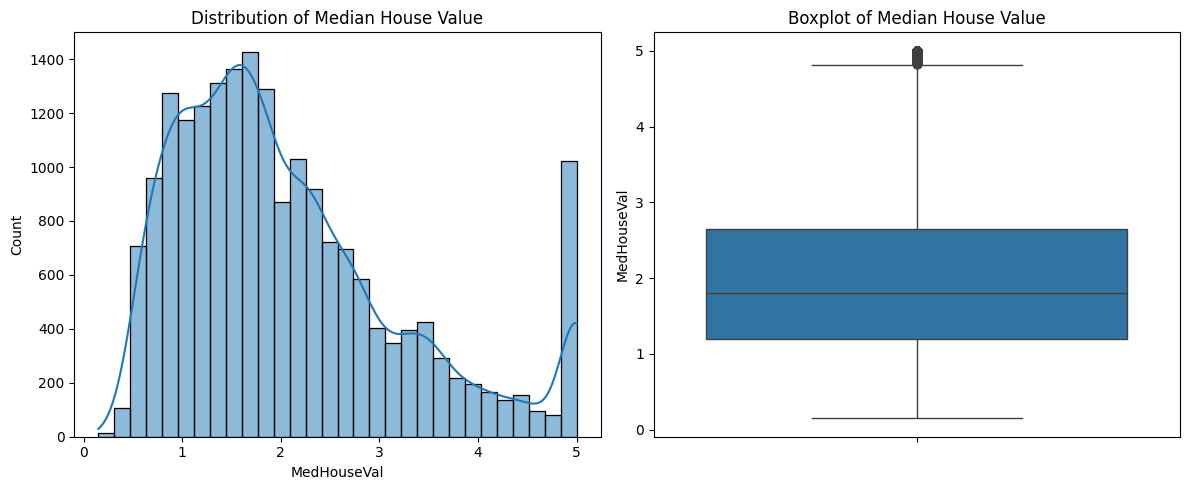

In [174]:
# 2. Target Variable Analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['MedHouseVal'], kde=True, bins=30)
plt.title('Distribution of Median House Value')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['MedHouseVal'])
plt.title('Boxplot of Median House Value')
plt.tight_layout()
plt.show()

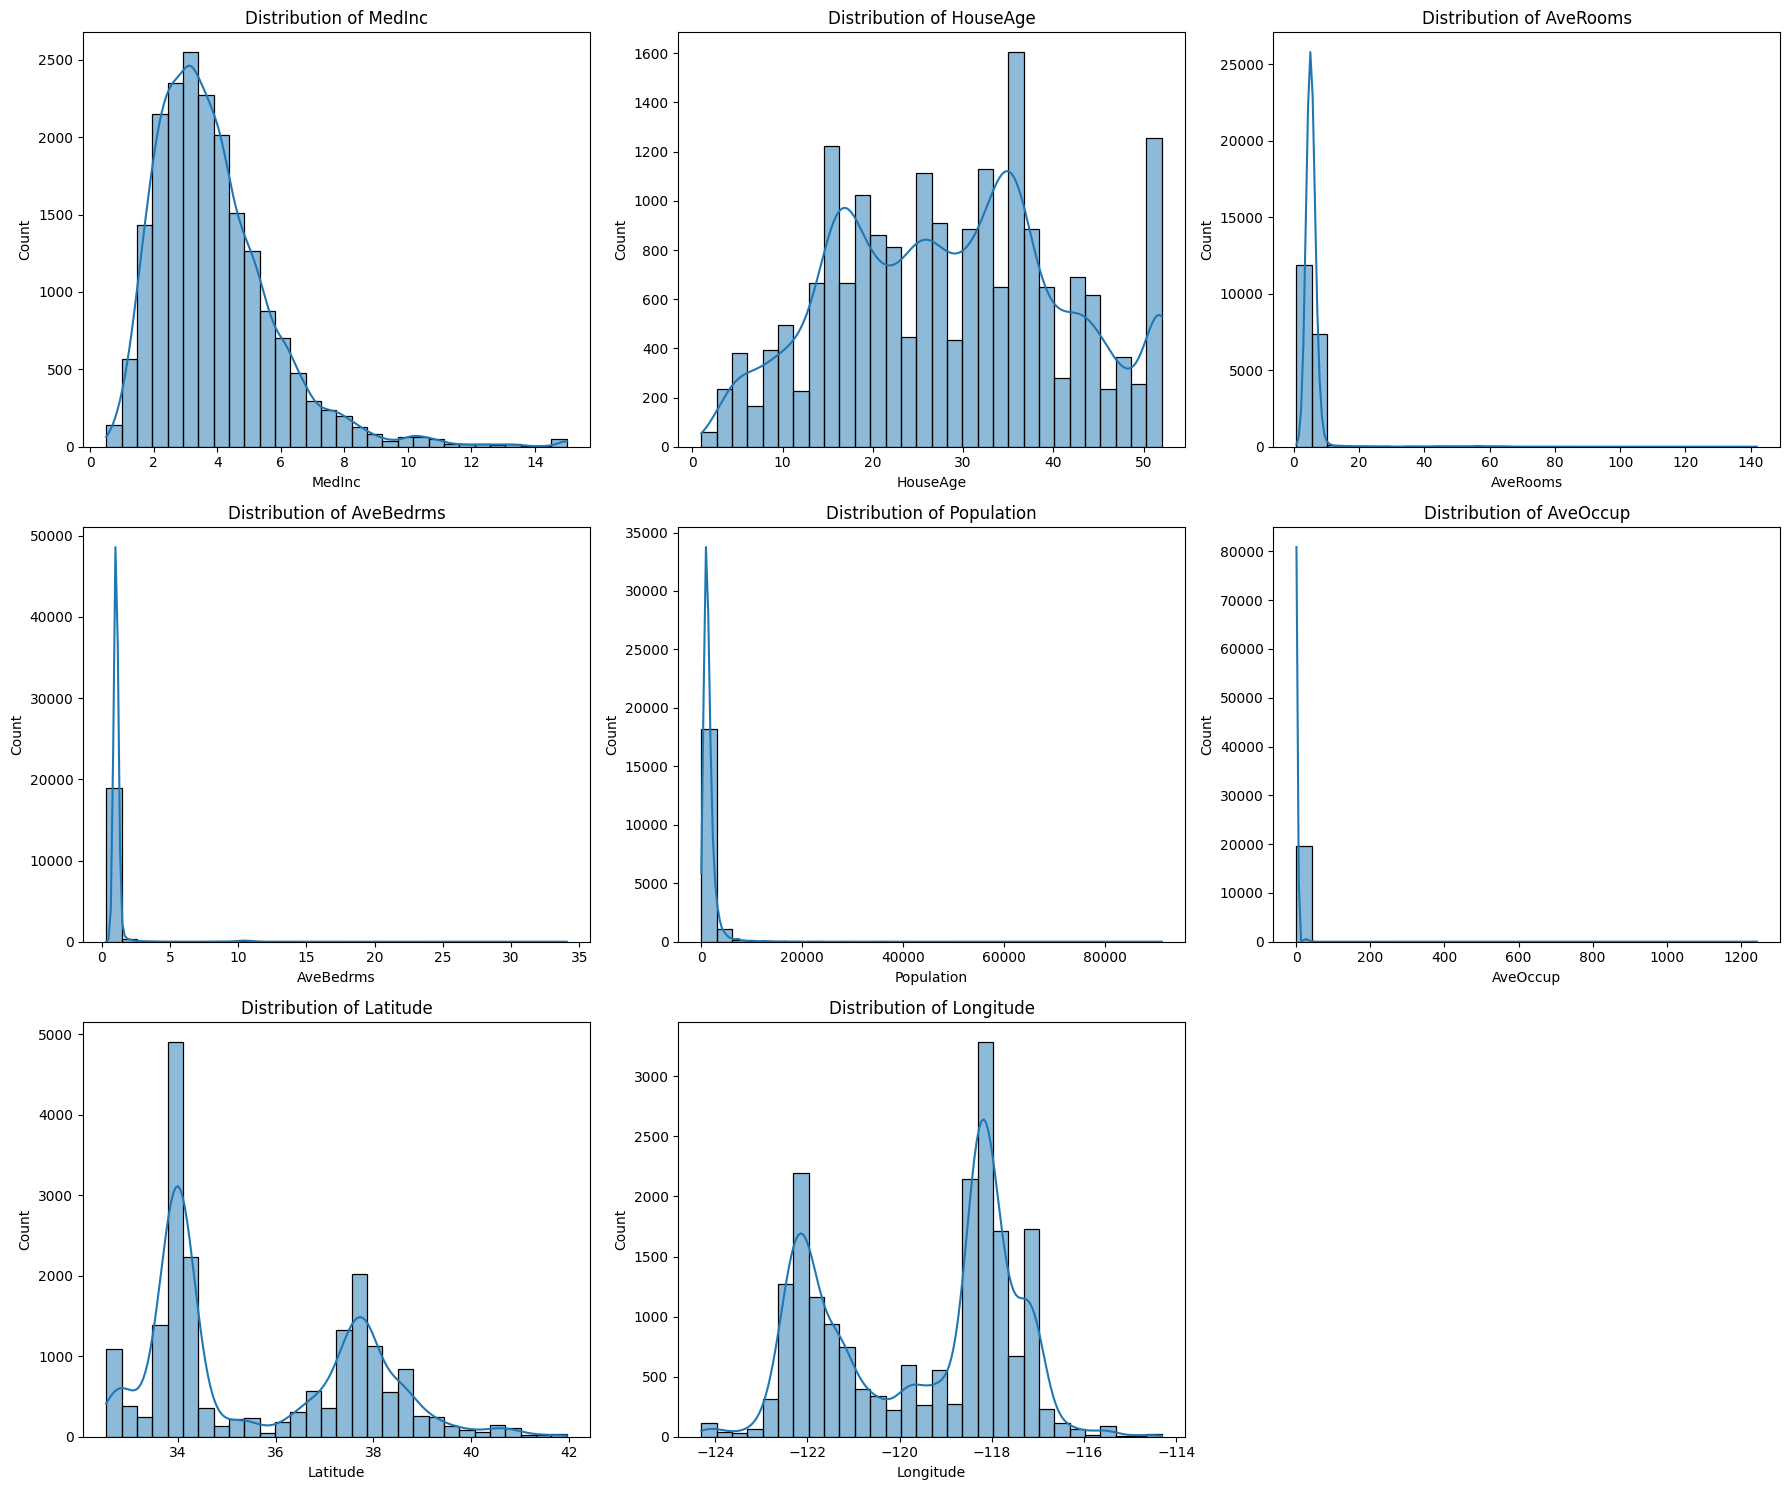

In [175]:
# 3. Numerical Features Distribution
num_features = df.columns[:-1]
plt.figure(figsize=(18, 15))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

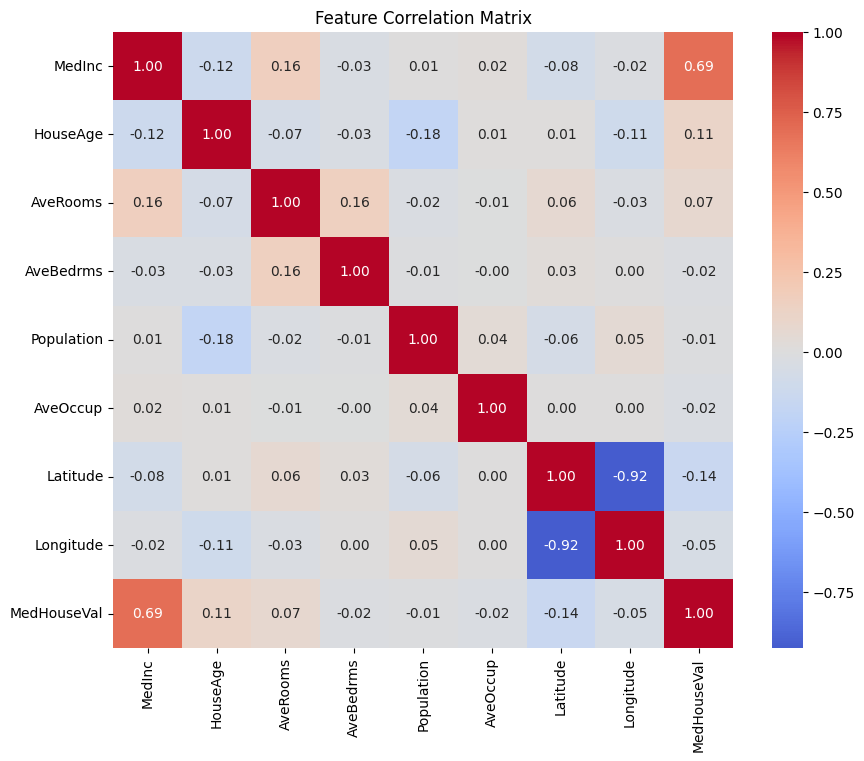

In [176]:
# 4. Correlation Analysis
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

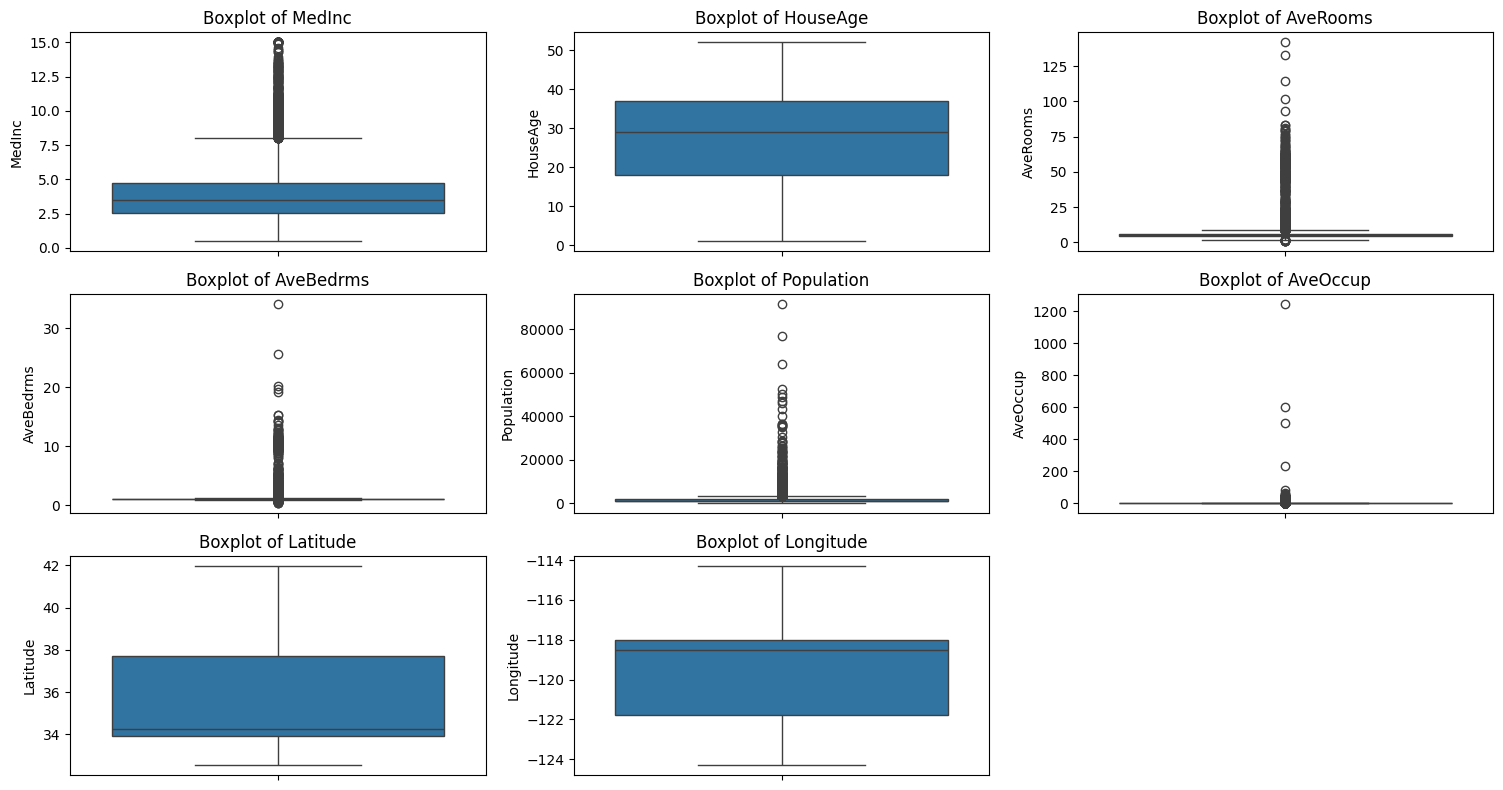

In [177]:
# 5. Outlier Detection
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

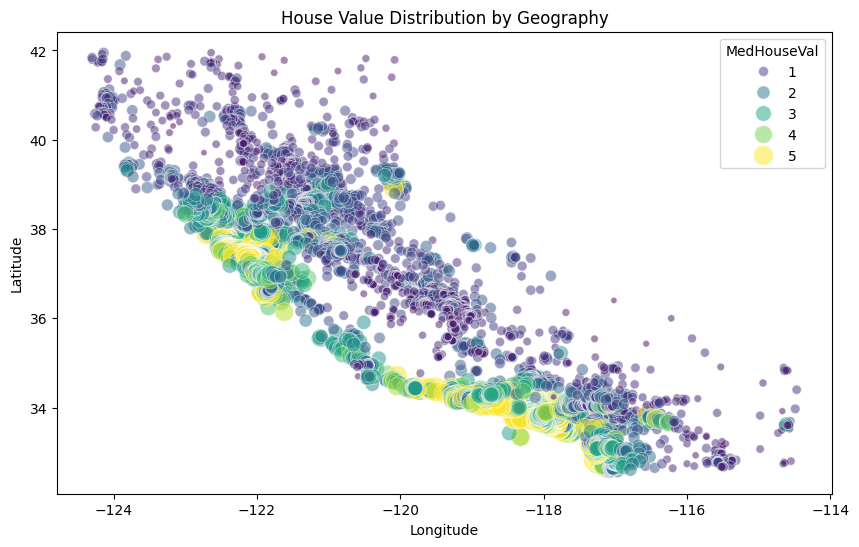

In [178]:
# 6. Geographical Distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='MedHouseVal', 
                size='MedHouseVal', sizes=(20, 200), alpha=0.5,
                palette='viridis', data=df)
plt.title('House Value Distribution by Geography')
plt.show()

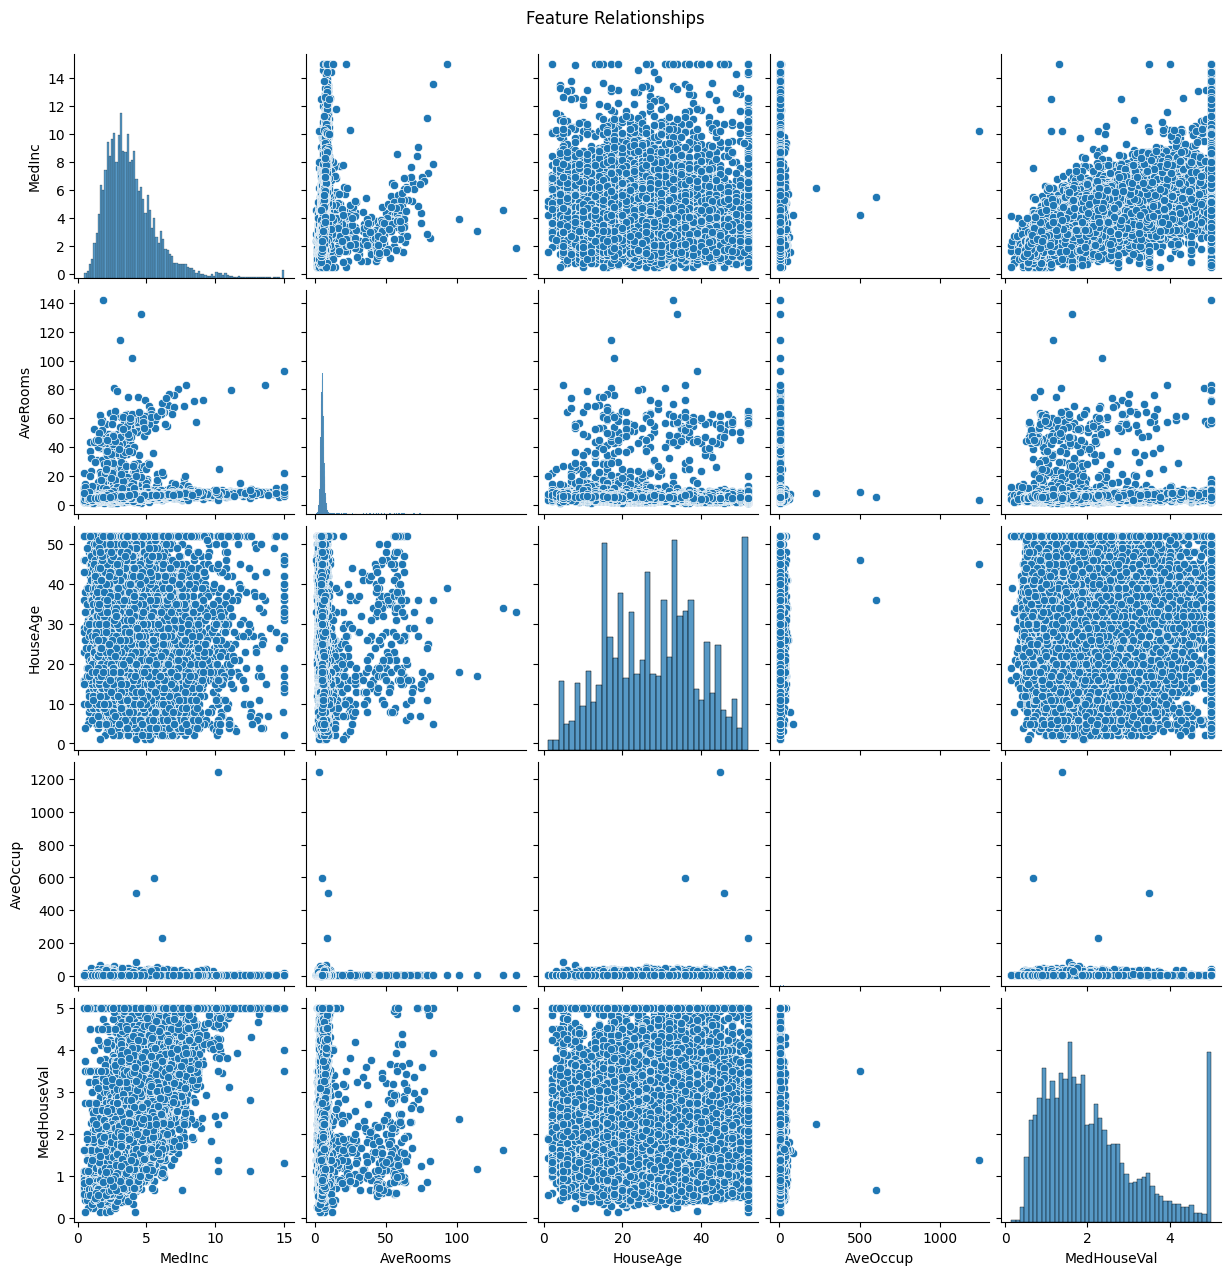

In [179]:
# 7. Pairplot of Key Features
sns.pairplot(df[['MedInc', 'AveRooms', 'HouseAge', 'AveOccup', 'MedHouseVal']])
plt.suptitle('Feature Relationships', y=1.02)
plt.show()

### **3. Feature Engineering and Preprocessing**

In [180]:
# 1. Missing Value Treatment
# Median imputation for all features
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [181]:
# 2. Outlier Handling
# Log transform for skewed features
skewed_features = ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']
for feature in skewed_features:
    df_imputed[feature] = np.log1p(df_imputed[feature])

# Winsorization for extreme values
for col in ['MedInc', 'HouseAge']:
    q1, q3 = df_imputed[col].quantile([0.01, 0.99])
    df_imputed[col] = np.clip(df_imputed[col], q1, q3)

In [182]:
# 3. Feature Creation
# Ratio features
df_imputed['RoomsPerHousehold'] = df_imputed['AveRooms']/(df_imputed['AveOccup']+1e-6)
df_imputed['BedroomsPerRoom'] = df_imputed['AveBedrms']/(df_imputed['AveRooms']+1e-6)
df_imputed['IncomePerRoom'] = df_imputed['MedInc']/(df_imputed['AveRooms']+1e-6)

# Geographic features
df_imputed['CoastalProximity'] = np.sqrt(
    (df_imputed['Longitude']+114.6)**2 + 
    (df_imputed['Latitude']-35.4)**2)  # Distance from approximate coastal center

In [183]:
# 4. Data Splitting
X = df_imputed.drop('MedHouseVal', axis=1)
y = df_imputed['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [184]:
# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [185]:
# 6. Dimensionality Reduction (Optional)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### **4. Modeling and Evaluation**

In [186]:
# 1. Model Training & Cross-Validation (Updated)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (α=1.0)': Ridge(alpha=1.0),
    'Lasso (α=0.1)': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf', C=1.0)
}

metrics = {
    'RMSE': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))),
    'R2': 'r2',
    'MAE': 'neg_mean_absolute_error'
}

results = []
for name, model in models.items():
    cv_results = cross_validate(model, X_train_scaled, y_train, 
                              cv=5, scoring=metrics, n_jobs=-1)
    
    results.append({
        'Model': name,
        'Avg RMSE': np.mean(cv_results['test_RMSE']),
        'RMSE Std': np.std(cv_results['test_RMSE']),
        'Avg R2': np.mean(cv_results['test_R2']),
        'Avg MAE': np.mean(-cv_results['test_MAE']),
        'Fit Time': np.mean(cv_results['fit_time'])
    })

<Figure size 1200x600 with 0 Axes>

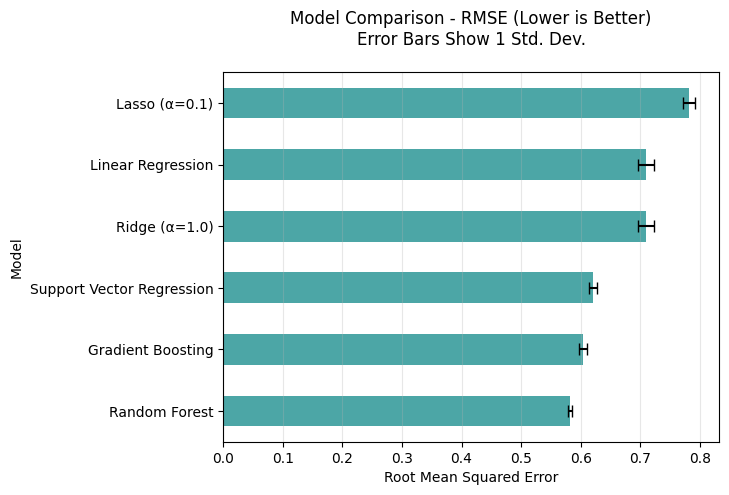

<Figure size 1200x600 with 0 Axes>

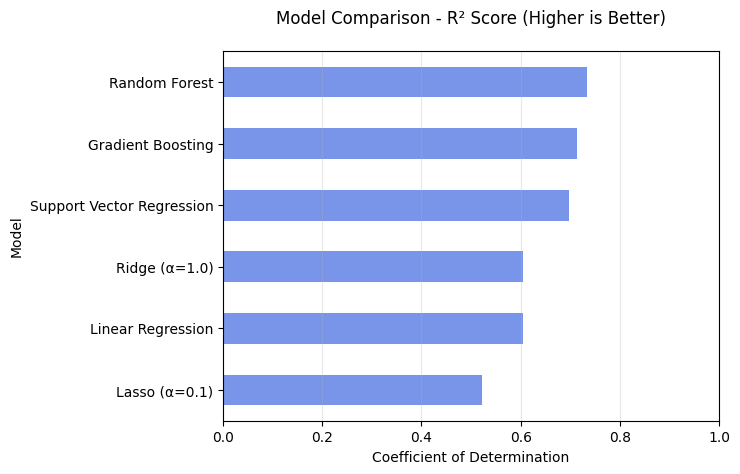

,Model,Avg RMSE,RMSE Std,Avg R2,Avg MAE,Fit Time
3,Random Forest,0.5822,0.0032,0.7342,0.3934,17.186s
4,Gradient Boosting,0.6035,0.0066,0.7145,0.4242,5.260s
5,Support Vector Regression,0.6210,0.0070,0.6977,0.4203,4.890s
1,Ridge (α=1.0),0.7092,0.0131,0.6057,0.5154,0.006s
0,Linear Regression,0.7092,0.0131,0.6057,0.5153,0.005s
2,Lasso (α=0.1),0.7817,0.0106,0.5211,0.5879,0.009s


In [187]:
# 2. Performance Visualization (Fixed)
results_df = pd.DataFrame.from_records(results)

# RMSE comparison plot
plt.figure(figsize=(12, 6))
results_df.sort_values('Avg RMSE').plot(
    x='Model', y='Avg RMSE', kind='barh', 
    xerr='RMSE Std', legend=False, color='teal',
    capsize=4, alpha=0.7)
plt.title('Model Comparison - RMSE (Lower is Better)\nError Bars Show 1 Std. Dev.', pad=20)
plt.xlabel('Root Mean Squared Error')
plt.grid(axis='x', alpha=0.3)
plt.show()

# R2 comparison plot
plt.figure(figsize=(12, 6))
results_df.sort_values('Avg R2').plot(
    x='Model', y='Avg R2', kind='barh', 
    legend=False, color='royalblue', alpha=0.7)
plt.title('Model Comparison - R² Score (Higher is Better)', pad=20)
plt.xlabel('Coefficient of Determination')
plt.grid(axis='x', alpha=0.3)
plt.xlim(0, 1)  # R2 is bounded [0,1]
plt.show()

# Additional Metrics Table
display(results_df.sort_values('Avg RMSE').style
       .background_gradient(cmap='Blues', subset=['Avg RMSE','Avg MAE'])
       .background_gradient(cmap='Greens', subset=['Avg R2'])
       .format({
           'Avg RMSE': '{:.4f}',
           'RMSE Std': '{:.4f}',
           'Avg R2': '{:.4f}',
           'Avg MAE': '{:.4f}',
           'Fit Time': '{:.3f}s'
       })
       .set_caption('Model Performance Summary'))

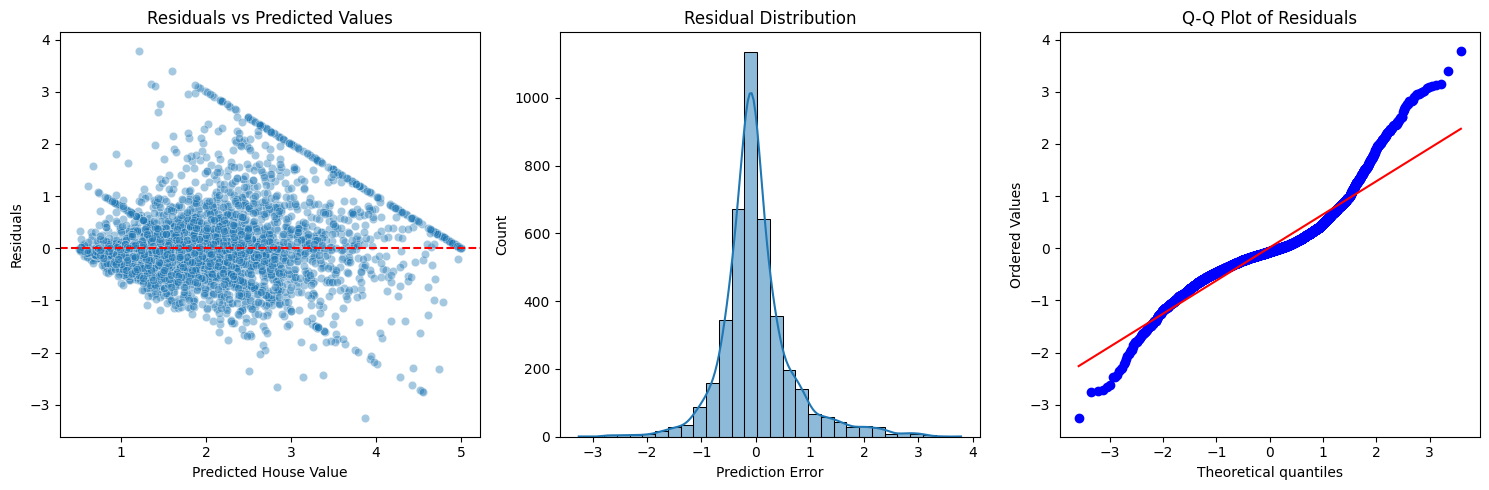

In [189]:
# 3. Residual Analysis
best_model = RandomForestRegressor().fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)
residuals = y_test - y_pred

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_pred, y=residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted House Value')
plt.ylabel('Residuals')

plt.subplot(1, 3, 2)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residual Distribution')
plt.xlabel('Prediction Error')

plt.subplot(1, 3, 3)
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

### **5. Hyperparameter Tuning**

Starting Grid Search...
Fitting 2 folds for each of 12 candidates, totalling 24 fits

=== Tuning Results ===
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best RMSE: 0.5683624262182506
Best R2: 0.882371213202227


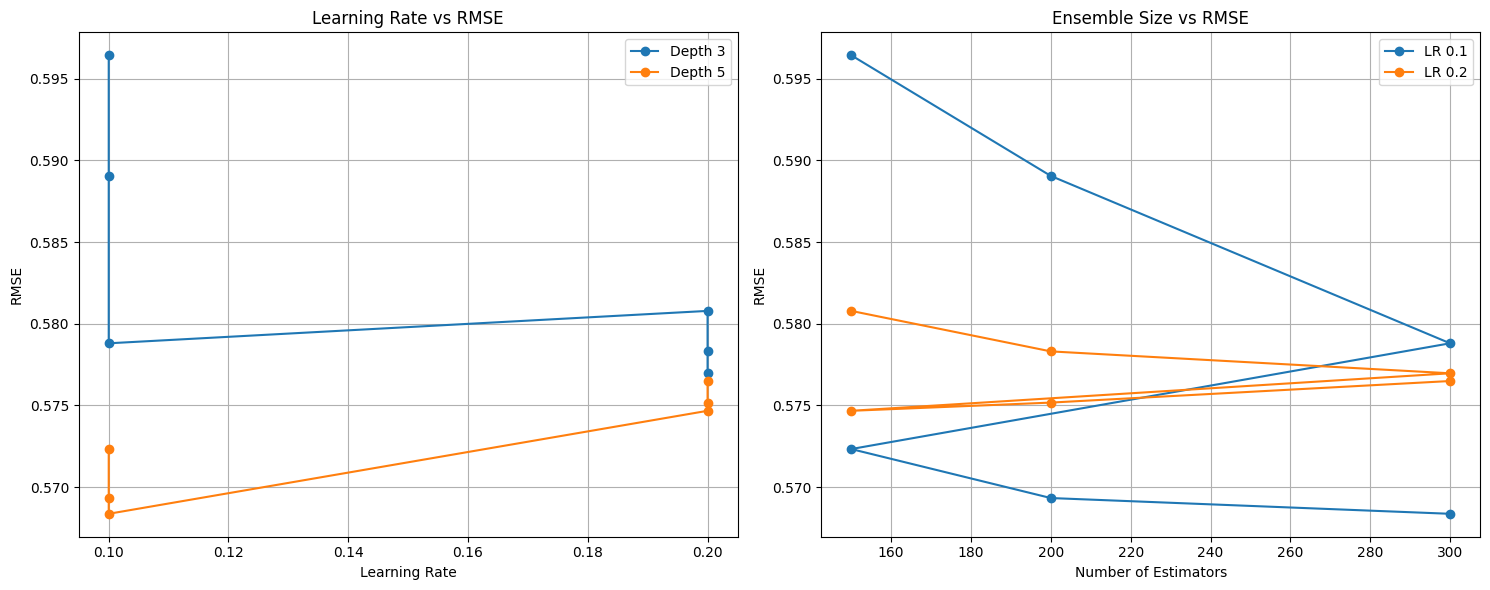

In [191]:
# Initialize Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [150, 200, 300],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5]
    #'min_samples_split': [2, 5],
    #'min_samples_leaf': [1, 2]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=2,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,  # More detailed output
    return_train_score=True
)

# Execute grid search
print("Starting Grid Search...")
grid_search.fit(X_train_scaled, y_train)

# Results analysis
print("\n=== Tuning Results ===")
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))
print("Best R2:", grid_search.best_estimator_.score(X_train_scaled, y_train))

# Visualize parameter effects
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(15, 6))

# Learning rate vs performance
plt.subplot(1, 2, 1)
for depth in param_grid['max_depth']:
    subset = results[results['param_max_depth'] == depth]
    plt.plot(subset['param_learning_rate'], np.sqrt(-subset['mean_test_score']), 
             'o-', label=f"Depth {depth}")
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.title('Learning Rate vs RMSE')
plt.legend()
plt.grid()

# Number of estimators vs performance
plt.subplot(1, 2, 2)
for lr in param_grid['learning_rate']:
    subset = results[results['param_learning_rate'] == lr]
    plt.plot(subset['param_n_estimators'], np.sqrt(-subset['mean_test_score']), 
             'o-', label=f"LR {lr}")
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('Ensemble Size vs RMSE')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### **6. Feature Importance Analysis**

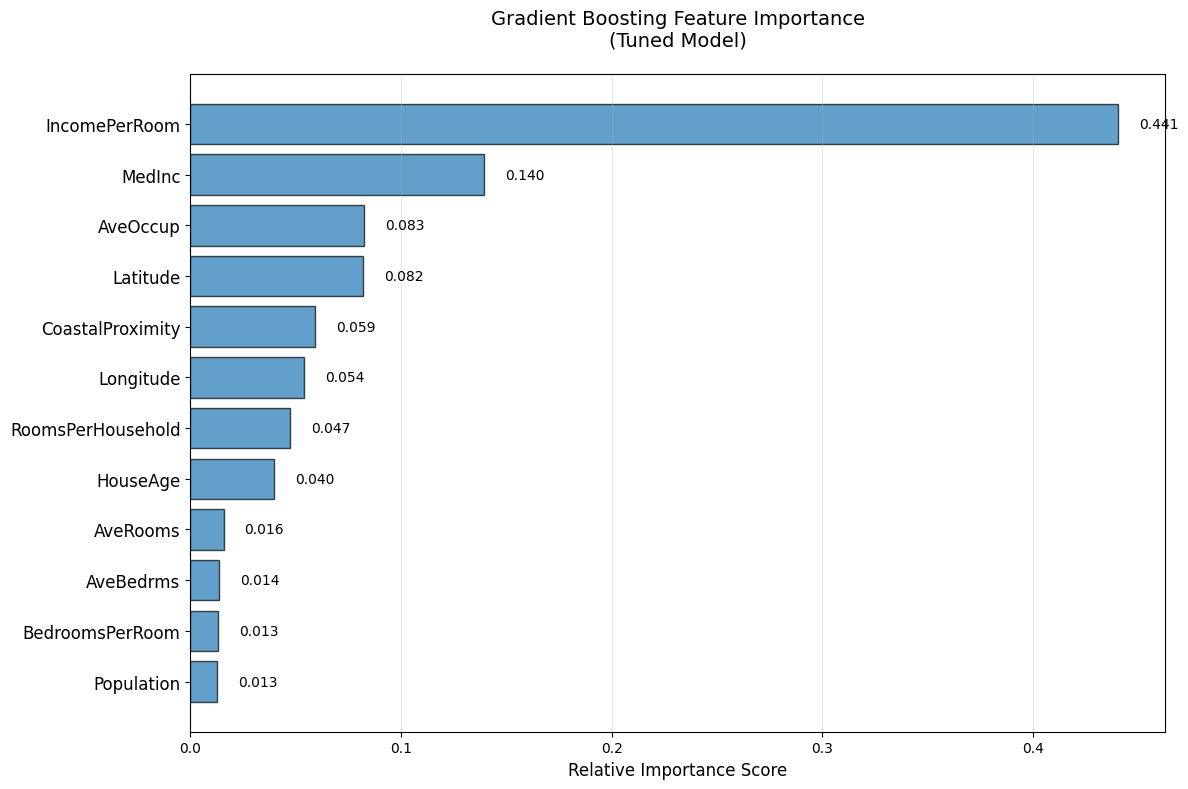

In [192]:
# Get feature importance from the trained Gradient Boosting model
best_gb = grid_search.best_estimator_  # Get the best tuned model
feature_importance = best_gb.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(len(sorted_idx)) + 0.5  # Positions for y-axis ticks

# Create the plot
plt.figure(figsize=(12, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center', 
         color='#1f77b4', alpha=0.7, edgecolor='black')
plt.yticks(pos, np.array(X.columns)[sorted_idx], fontsize=12)
plt.xlabel('Relative Importance Score', fontsize=12)
plt.title('Gradient Boosting Feature Importance\n(Tuned Model)', fontsize=14, pad=20)

# Add importance values on bars
for i, v in enumerate(feature_importance[sorted_idx]):
    plt.text(v + 0.01, pos[i], f"{v:.3f}", 
             color='black', va='center', fontsize=10)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### **7. Final Evaluation on Test Set**


=== Final Model Comparison on Test Set ===


,RMSE,R2,MAE,Max Error
Gradient Boosting,0.6284,0.6839,0.4178,3.5869
Random Forest,0.6632,0.6479,0.4403,3.8258
Linear Regression,0.8265,0.4530,0.5885,4.9223
Ridge Regression,0.8266,0.4530,0.5886,4.9217
Lasso Regression,0.8954,0.3581,0.6591,4.2733


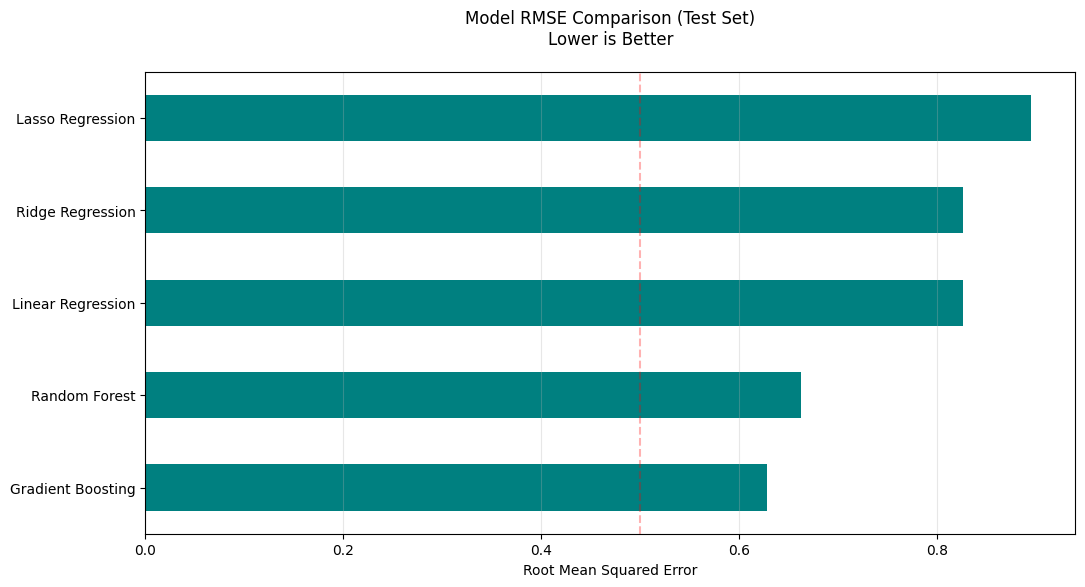

In [193]:
# Final Model Evaluation on Test Set
final_results = {}
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
    'Gradient Boosting': grid_search.best_estimator_  # Our tuned model
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    final_results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'Max Error': max_error(y_test, y_pred)
    }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(final_results).T.sort_values('RMSE')

# Display formatted results
print("\n=== Final Model Comparison on Test Set ===")
display(results_df.style
       .background_gradient(cmap='Blues', subset=['RMSE','MAE'])
       .background_gradient(cmap='Greens', subset=['R2'])
       .format({
           'RMSE': '{:.4f}',
           'R2': '{:.4f}',
           'MAE': '{:.4f}',
           'Max Error': '{:.4f}'
       })
       .set_caption('Model Performance on Holdout Test Data'))

# Visualize results
plt.figure(figsize=(12, 6))
results_df['RMSE'].sort_values().plot(kind='barh', color='teal')
plt.title('Model RMSE Comparison (Test Set)\nLower is Better', pad=20)
plt.xlabel('Root Mean Squared Error')
plt.axvline(x=0.5, color='red', linestyle='--', alpha=0.3)
plt.grid(axis='x', alpha=0.3)
plt.show()

### **8. Residual Analysis**

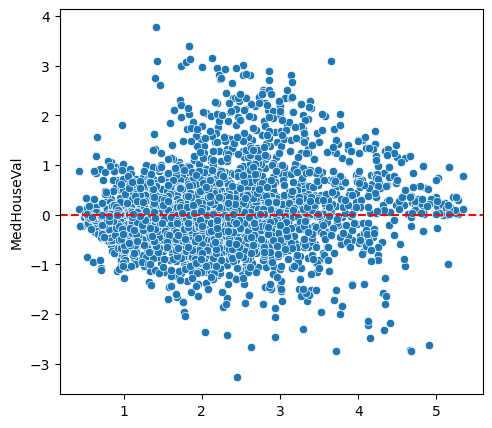

In [194]:
# Residual plots for the best model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

### **9. Final Pipeline**

In [ ]:
# Create production-ready pipeline
final_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=4,
        random_state=42
    ))
])

from joblib import dump
dump(final_pipeline, 'california_housing_pipeline.joblib')

## **4.2. Australian Weather Prediction Project**

### **Description**

**Objective**  
The goal of this project is to build a predictive model that forecasts whether it will rain the next day (**RainTomorrow**) based on historical weather data from multiple locations across Australia.

**Dataset Overview**  
The dataset contains **10 years** of daily weather observations from various Australian weather stations. 

**Features:**  
- **Date**: Date of observation  
- **Location**: Name of the weather station location  
- **MinTemp**: Minimum temperature (°C)  
- **MaxTemp**: Maximum temperature (°C)  
- **Rainfall**: Amount of daily rainfall (mm)  
- **Evaporation**: Evaporation over the past 24 hours  
- **Sunshine**: Number of hours of sunshine in a day  
- **WindGustDir**: Direction of the strongest wind gust in the past 24 hours  
- **WindGustSpeed**: Speed of the strongest wind gust (km/h)  
- **WindDir9am, WindDir3pm**: Wind direction at 9 AM and 3 PM  
- **WindSpeed9am, WindSpeed3pm**: Wind speed at 9 AM and 3 PM (km/h)  
- **Humidity9am, Humidity3pm**: Humidity at 9 AM and 3 PM (%)  
- **Pressure9am, Pressure3pm**: Atmospheric pressure at 9 AM and 3 PM (hPa)  
- **Cloud9am, Cloud3pm**: Cloud cover at 9 AM and 3 PM (oktas)  
- **Temp9am, Temp3pm**: Temperature at 9 AM and 3 PM (°C)  
- **RainToday**: Binary indicator (1 if rain occurred today, 0 otherwise)  
- **RainTomorrow**: **Target variable** (1 if rain occurs tomorrow, 0 otherwise)  

**Key Characteristics:**
1. **Geographical Diversity**: Covers multiple locations across Australia with varying climate patterns
2. **Temporal Resolution**: Daily observations capturing short-term weather fluctuations
3. **Meteorological Comprehensiveness**: Includes all major weather parameters (temperature, humidity, wind, pressure, precipitation)
4. **Operational Measurements**: Features actual instrument readings used in weather forecasting
5. **Temporal Persistence**: Contains both current-day and previous-day weather indicators

**Data Challenges:**
1. **Class Imbalance**: Only ~22% of observations represent rainy days (severe imbalance)
2. **Missing Values**: Gaps in observations across various weather stations and parameters
3. **High-Dimensionality**: 20+ features requiring careful feature selection
4. **Temporal Autocorrelation**: Weather patterns exhibit strong day-to-day dependencies
5. **Outliers**: Extreme weather events (e.g., storms, heatwaves) present in the data
6. **Categorical Features**: Wind directions and locations require special encoding
7. **Scale Differences**: Features measured in different units (mm, km/h, hPa, etc.)

**Business Applications:**
1. **Agriculture**: Crop planning and irrigation management
2. **Tourism**: Event scheduling and destination recommendations
3. **Transportation**: Flight/train/ship route optimization
4. **Retail**: Demand forecasting for weather-sensitive products
5. **Energy**: Load prediction for power grid management
6. **Water Management**: Reservoir level control and flood prevention
7. **Outdoor Industries**: Construction, mining, and sports scheduling
8. **Insurance**: Risk assessment for weather-related claims
9. **Urban Planning**: Stormwater drainage system design
10. **Disaster Preparedness**: Early warning systems for extreme weather

### **1. Imports**

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.metrics import (
    make_scorer, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

import warnings
warnings.filterwarnings('ignore')


### **2. Load and inspect data**

In [196]:
df = pd.read_csv('weatherAUS.csv')
print(f"Dataset shape: {df.shape}")

Dataset shape: (145460, 23)


In [197]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [198]:
print("\nData types:")
print(df.dtypes.value_counts())


Data types:
float64    16
object      7
Name: count, dtype: int64


In [199]:
print("\nMissing values per column:\n", df.isnull().sum().sort_values(ascending=False))


Missing values per column:
 Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
WindSpeed9am      1767
Temp9am           1767
MinTemp           1485
MaxTemp           1261
Date                 0
Location             0
dtype: int64


### **3. EDA**

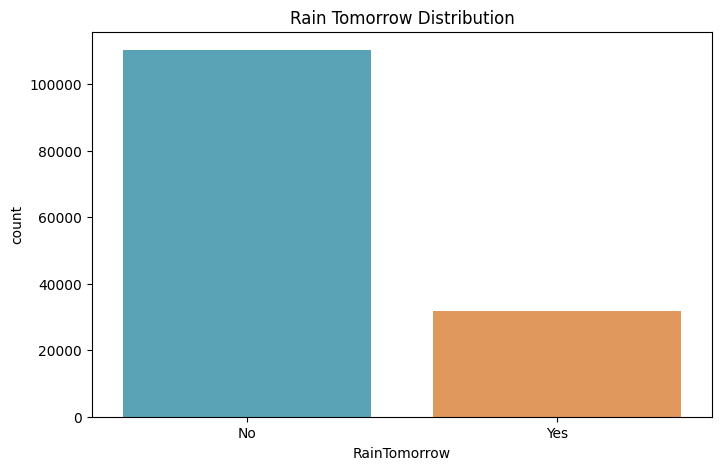

Target class distribution:
 RainTomorrow
No     0.775819
Yes    0.224181
Name: proportion, dtype: float64


In [200]:
# Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='RainTomorrow', data=df, palette=['#4BACC6', '#F79646'])
plt.title('Rain Tomorrow Distribution')
plt.show()

print("Target class distribution:\n", df['RainTomorrow'].value_counts(normalize=True))

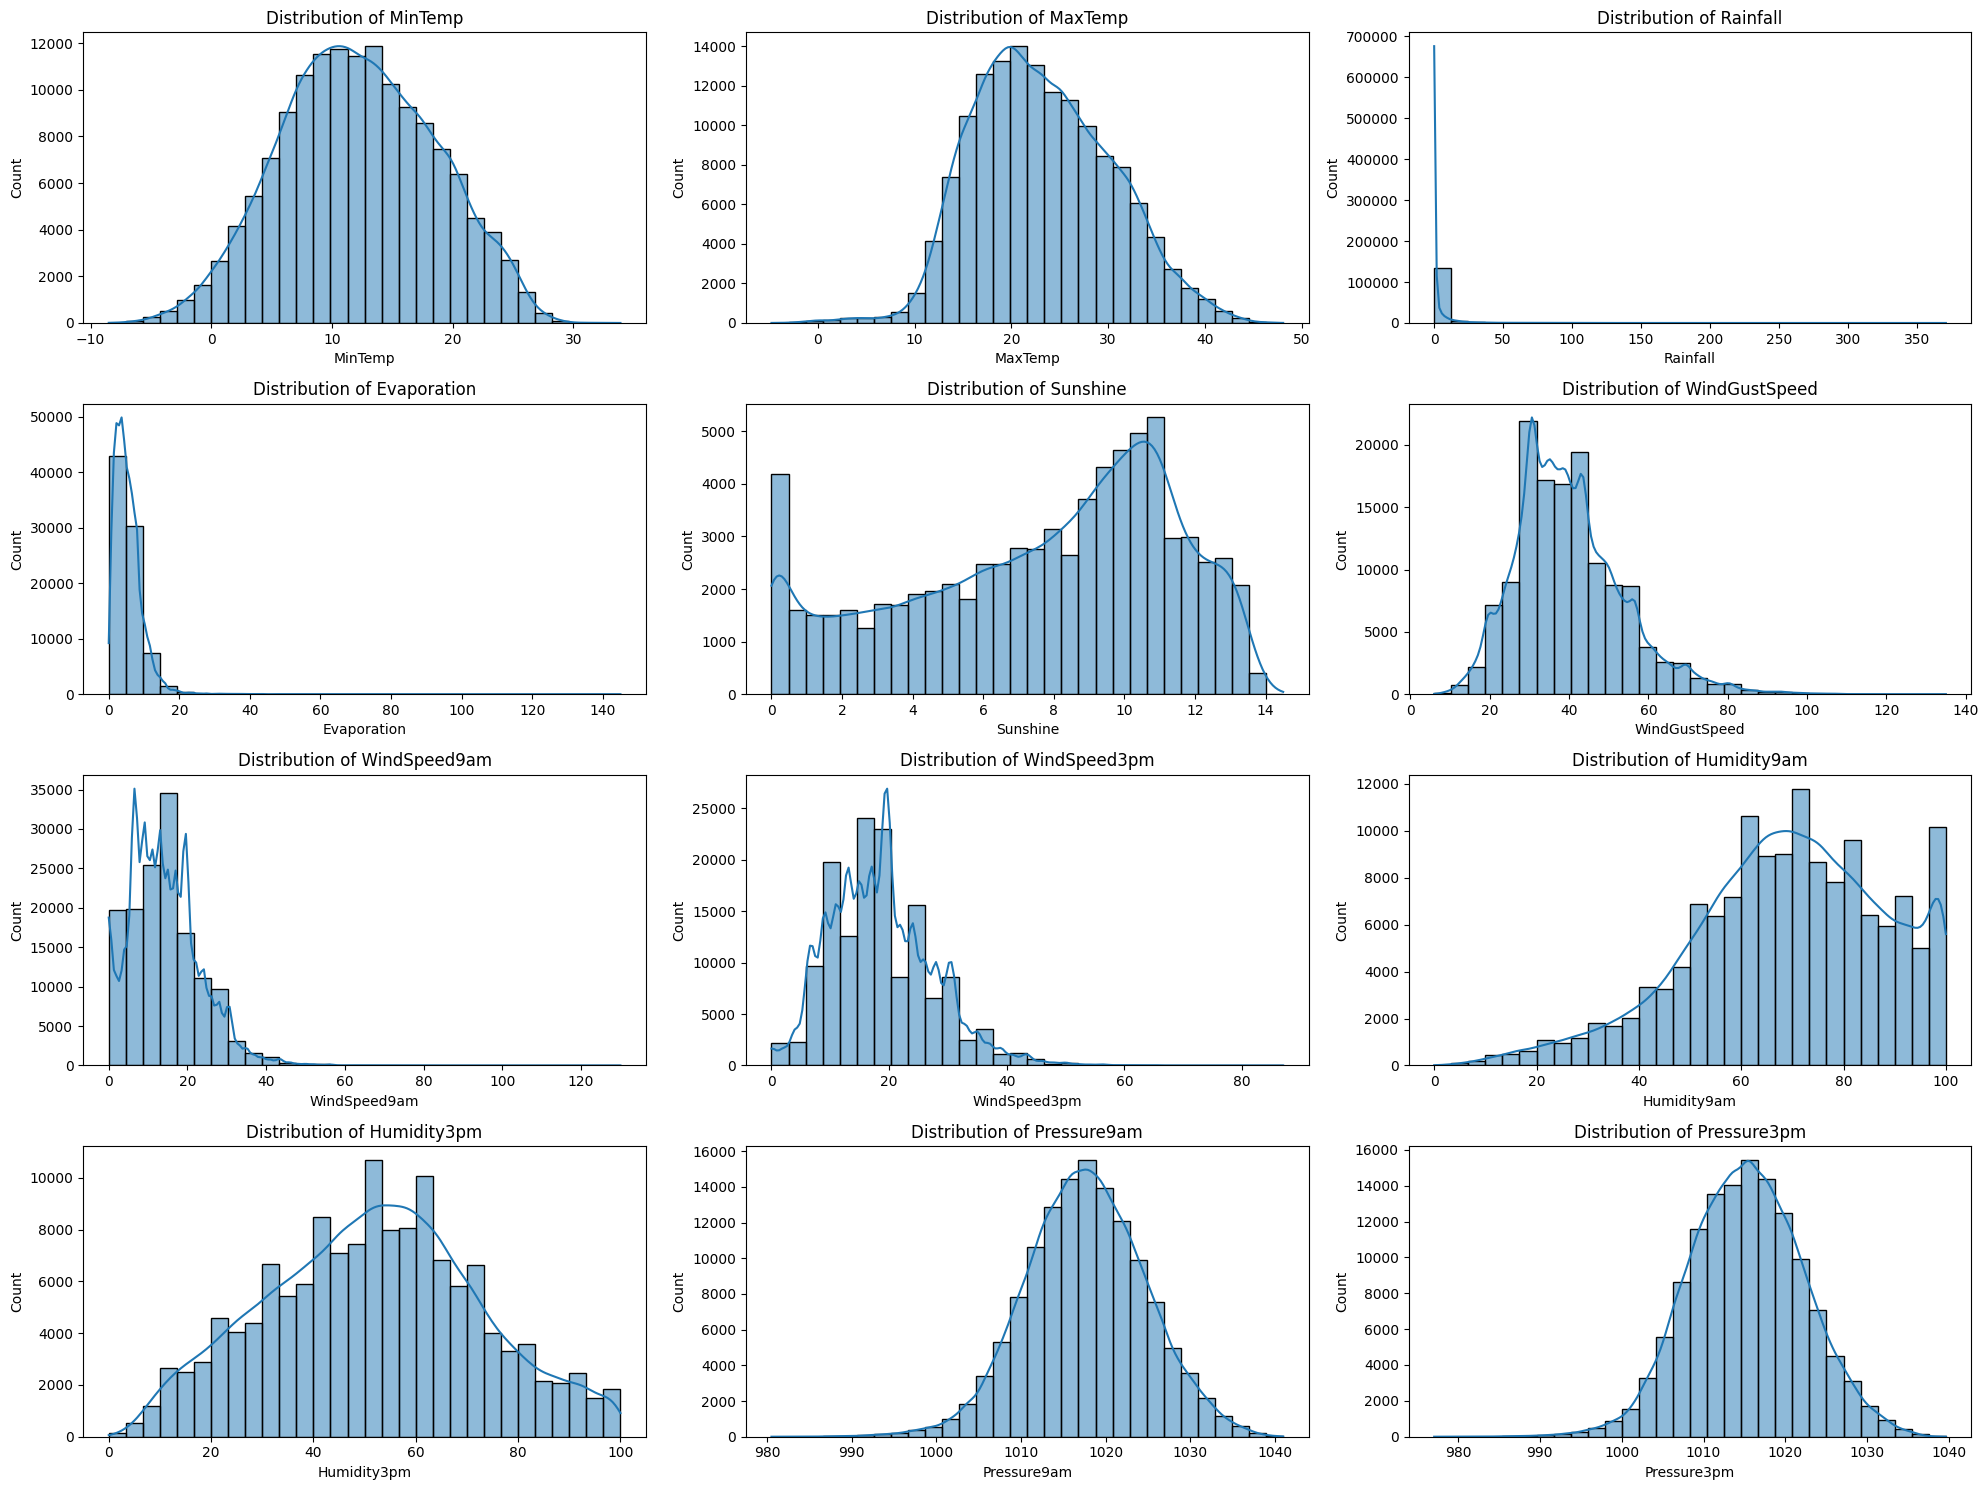

In [201]:
# Numerical Feature Distributions
num_cols = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols[:12]):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

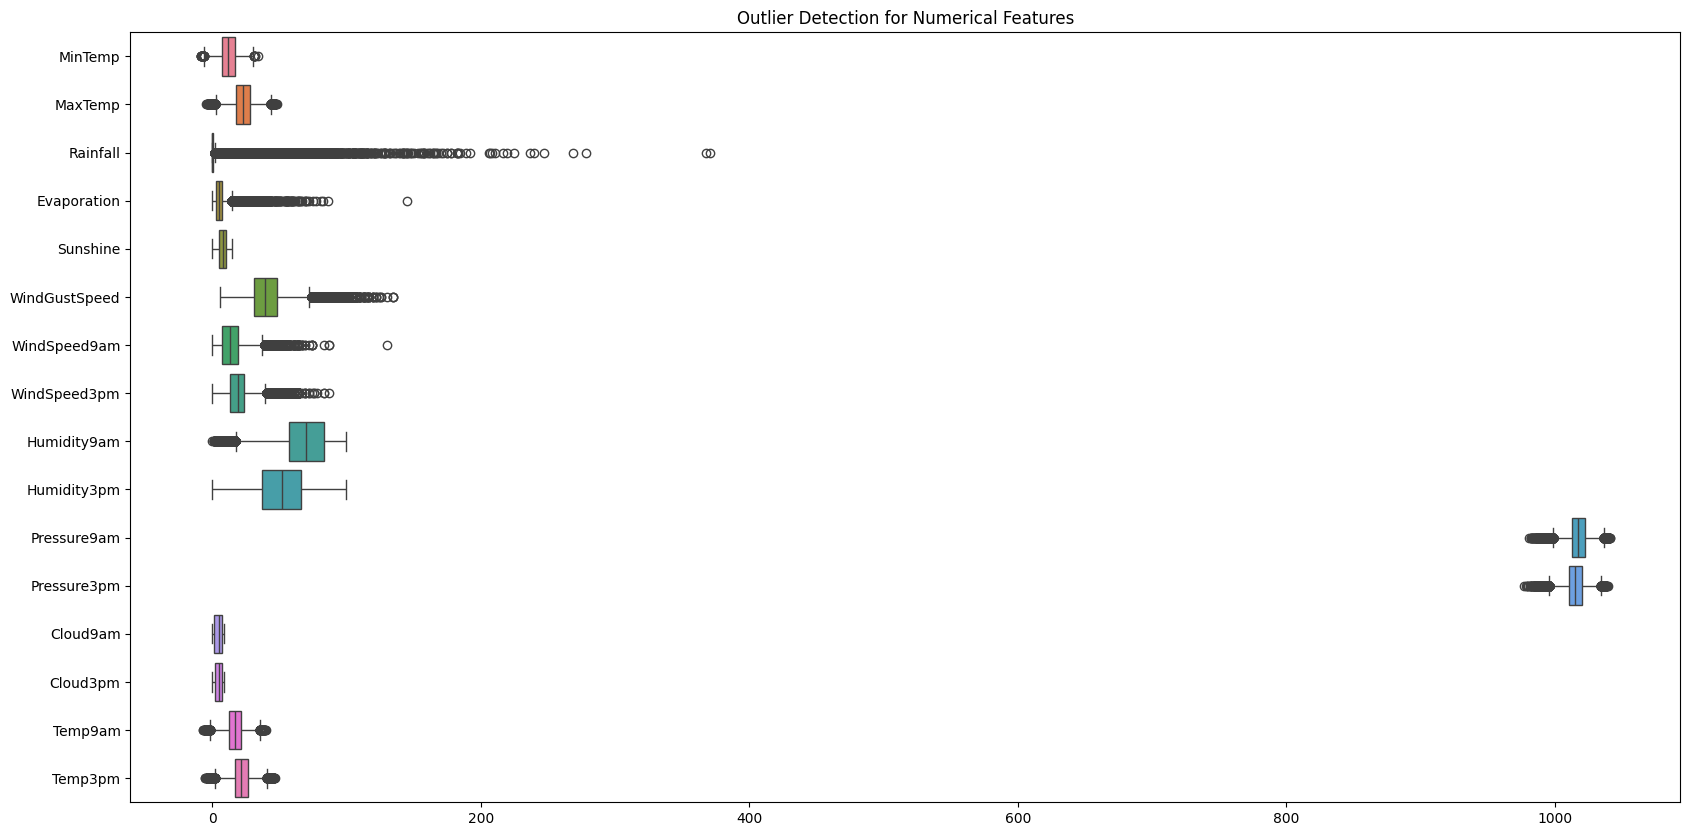

In [202]:
# Outlier Detection
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[num_cols], orient='h')
plt.title('Outlier Detection for Numerical Features')
plt.show()

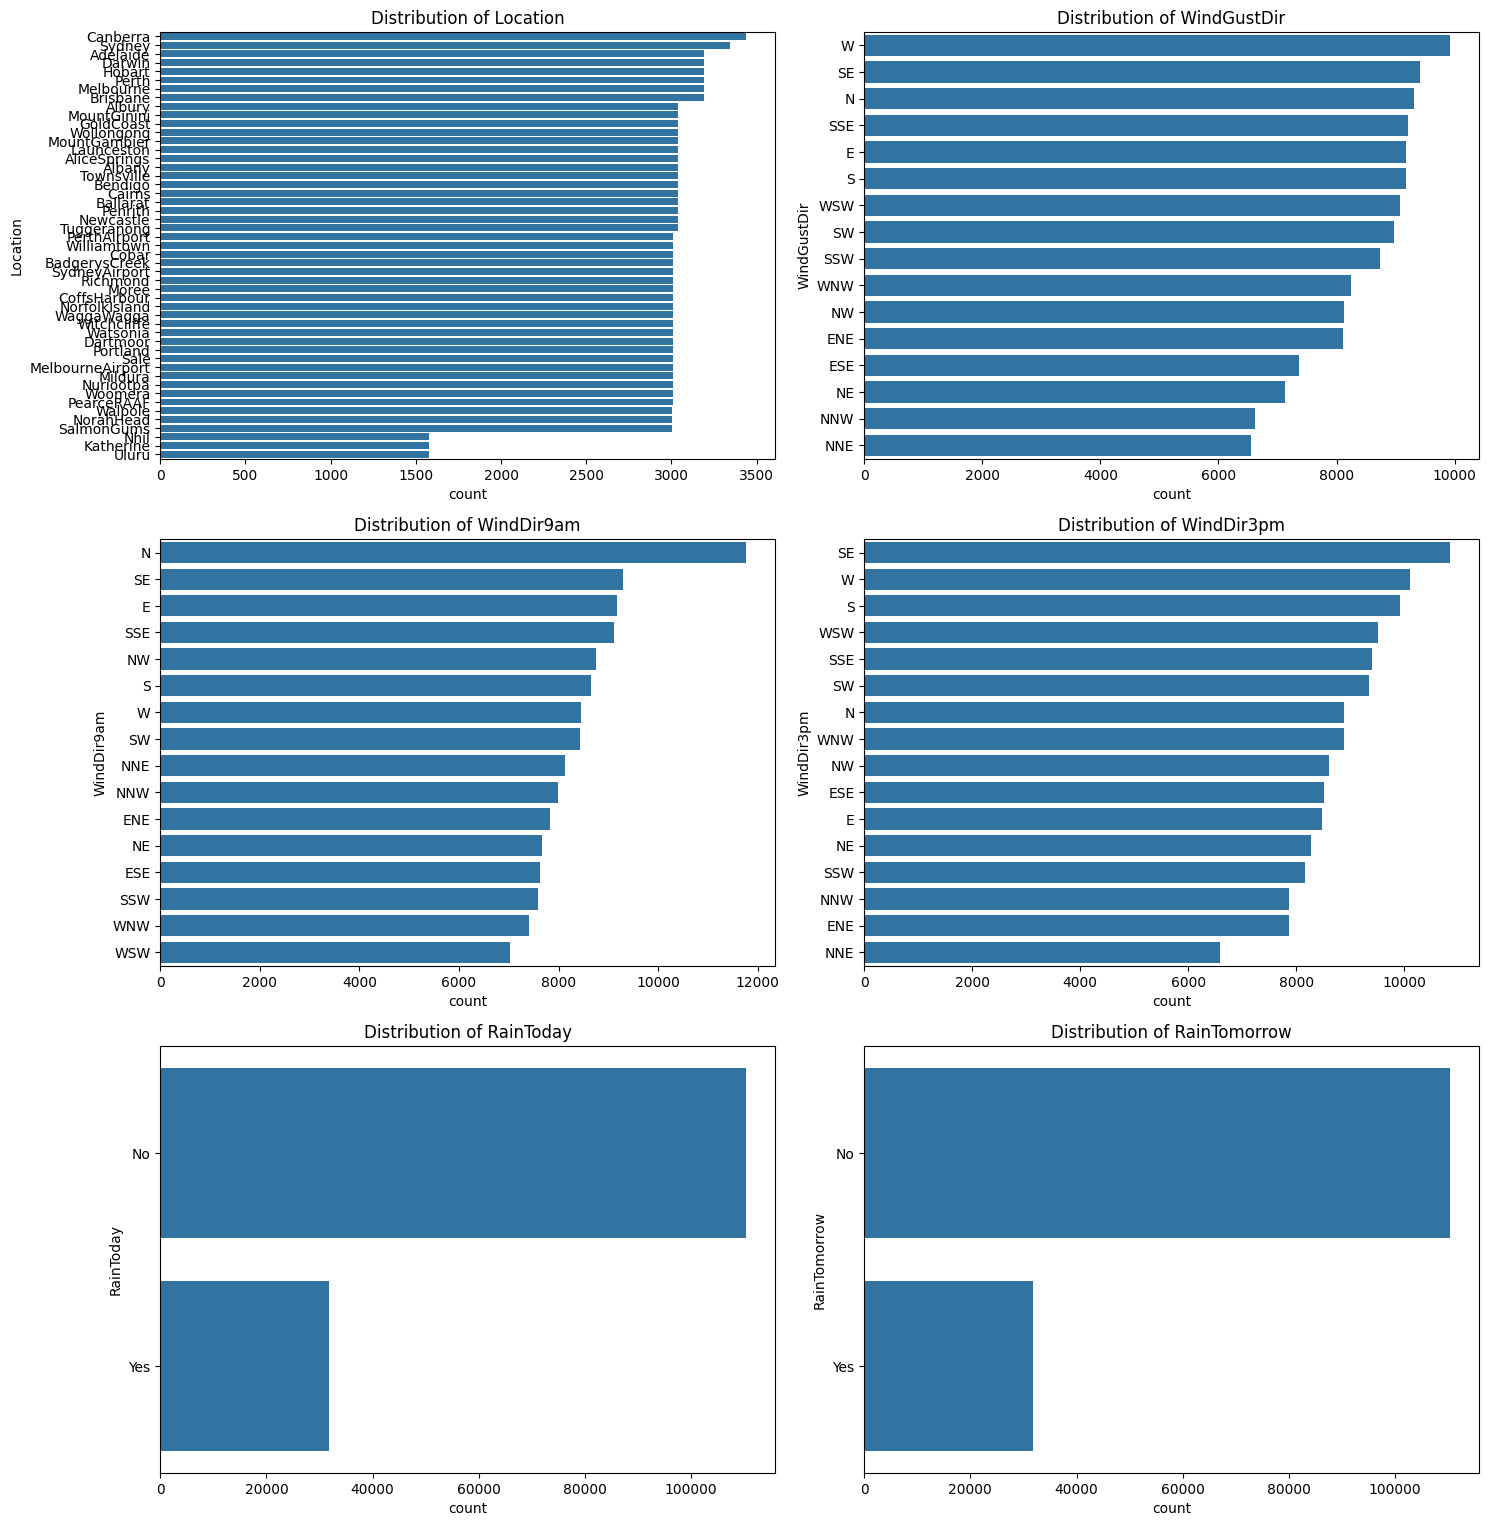

In [203]:
# Categorical Feature Analysis
cat_cols = df.select_dtypes(include=['object']).columns.drop(['Date'])

plt.figure(figsize=(15,20))
for i, col in enumerate(cat_cols):
    plt.subplot(4,2,i+1)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

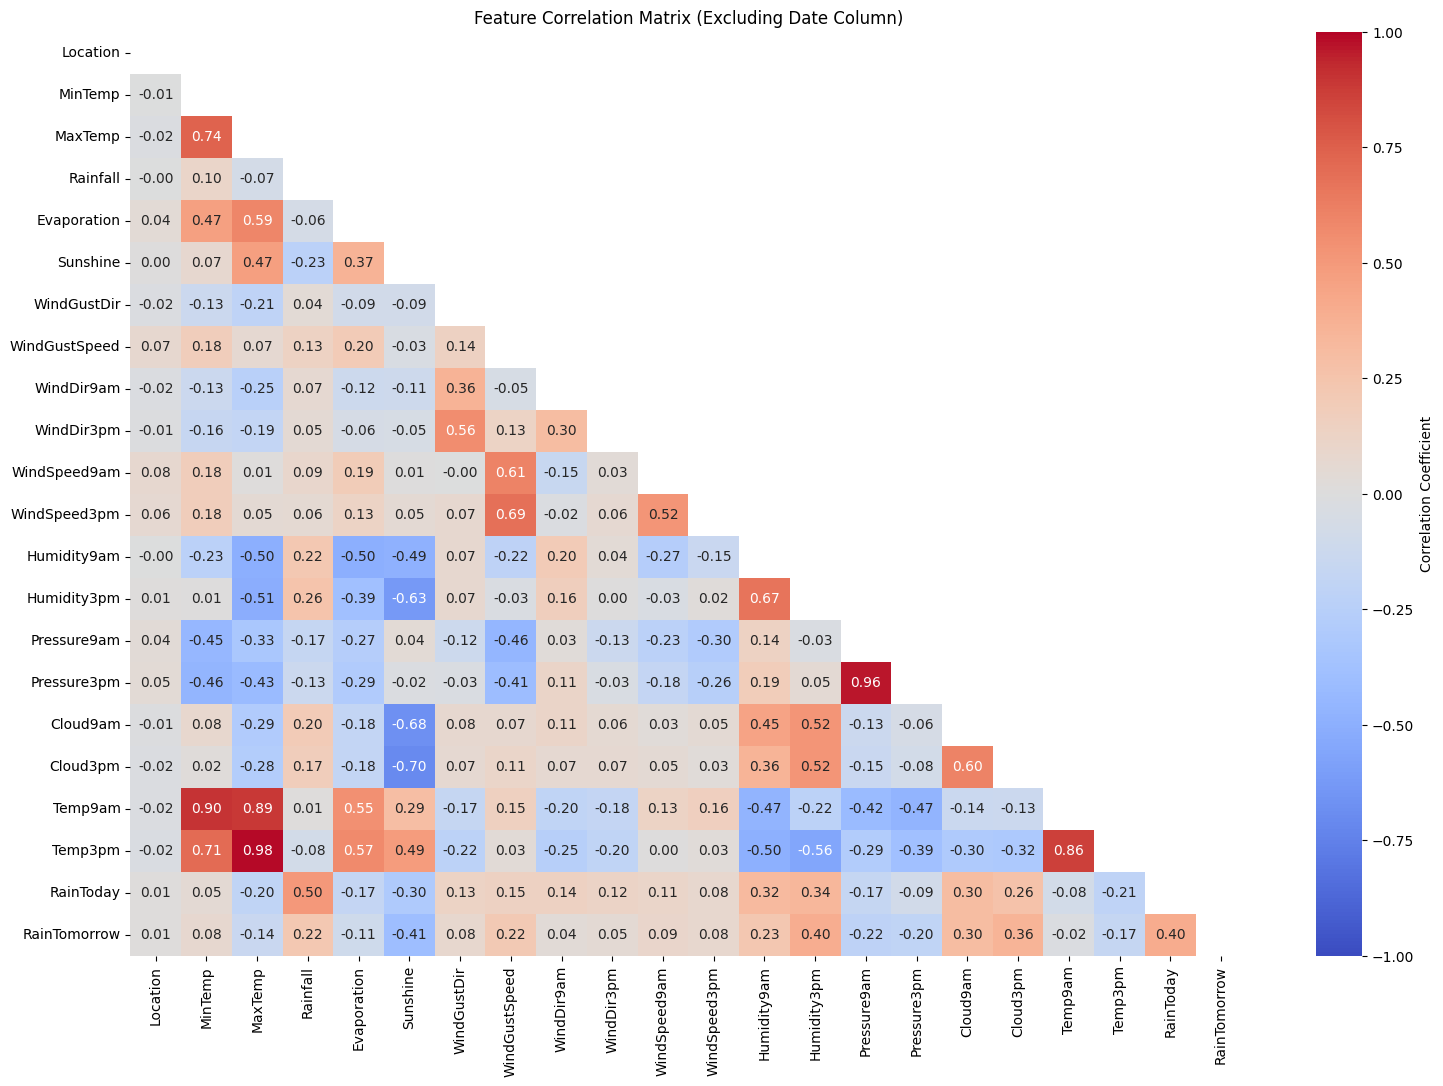

In [204]:
# Correlation Analysis
df_encoded = df.drop('Date', axis=1).copy()
cat_cols = df_encoded.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

plt.figure(figsize=(18,12))
corr = df_encoded.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Matrix (Excluding Date Column)')
plt.show()

### **4. Feature Engineering**

In [205]:
# Handling Missing Values
# Categorical - fill with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Numerical - fill with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

print("Remaining missing values:", df.isnull().sum().sum())

Remaining missing values: 0


In [206]:
# Outlier Treatment
for col in num_cols:
    q1 = df[col].quantile(0.05)
    q3 = df[col].quantile(0.95)
    df = df[(df[col] >= q1) & (df[col] <= q3)]
print("Post-outlier removal shape:", df.shape)

Post-outlier removal shape: (36353, 23)


In [207]:
# Feature Encoding and Scaling
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

features = df.drop(columns=['RainTomorrow', 'Date'])
target = df['RainTomorrow']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
X = pd.DataFrame(X_scaled, columns=features.columns)
y = target

### **5. Model Training & Cross-Validation**

In [208]:
# model trainig

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=15),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score),
    'ROC AUC': make_scorer(roc_auc_score)
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

# cv

for name, model in models.items():
    scores = cross_validate(model, X, y, cv=cv, scoring=metrics, n_jobs=-1)
    results.append({
        'Model': name,
        'Accuracy': f"{np.mean(scores['test_Accuracy']):.3f}",
        'Precision': f"{np.mean(scores['test_Precision']):.3f}",
        'Recall': f"{np.mean(scores['test_Recall']):.3f}",
        'F1': f"{np.mean(scores['test_F1']):.3f}",
        'ROC AUC': f"{np.mean(scores['test_ROC AUC']):.3f}",
        'Fit Time': f"{np.mean(scores['fit_time']):.2f}s"
    })

results_df = pd.DataFrame(results).set_index('Model')
print(results_df)

                    Accuracy Precision Recall     F1 ROC AUC Fit Time
Model                                                                
Logistic Regression    0.874     0.584  0.106  0.179   0.547    0.04s
KNN                    0.873     0.572  0.080  0.141   0.536    0.01s
Decision Tree          0.870     0.509  0.057  0.101   0.524    0.10s
Random Forest          0.876     0.646  0.102  0.176   0.547    4.30s
XGBoost                0.875     0.547  0.219  0.313   0.596    0.34s


**Description**

You trained five classification models using 5-fold cross-validation:

| Model                | Key Hyperparameters Used                      |
|---------------------|-----------------------------------------------|
| **Logistic Regression** | `max_iter=1000` – increased iteration cap to ensure convergence |
| **KNN (k-Nearest Neighbors)** | `n_neighbors=15` – each prediction based on 15 nearest samples |
| **Decision Tree**    | `max_depth=5` – limits tree complexity to avoid overfitting |
| **Random Forest**    | `n_estimators=100` – uses 100 trees for ensemble voting |
| **XGBoost**          | `eval_metric='logloss'`, `use_label_encoder=False` – modern syntax for cleaner output |


**K-Fold Cross-Validation (K=5)**: This technique splits the dataset into 5 equal parts. Each model trains on 4 parts and validates on the 5th, rotating so that every sample gets used in validation once. This reduces bias and gives a reliable estimate of generalization performance.

**Evaluation Metrics Explained**

Each model was evaluated using the following metrics:

| Metric        | Meaning                                                                 |
|---------------|-------------------------------------------------------------------------|
| **Accuracy**   | Overall correctness (TP + TN) / total samples                          |
| **Precision**  | Proportion of predicted rain days that were truly rain: TP / (TP + FP) |
| **Recall**     | Proportion of actual rain days detected: TP / (TP + FN)                |
| **F1 Score**   | Harmonic mean of precision and recall                                  |
| **ROC AUC**    | Probability the model ranks a random rain day higher than no-rain day  |

In imbalanced problems (like rain prediction), **F1** and **Recall** are more informative than accuracy, since the model can achieve high accuracy by mostly predicting "No Rain".


### **7. Performance Plot**

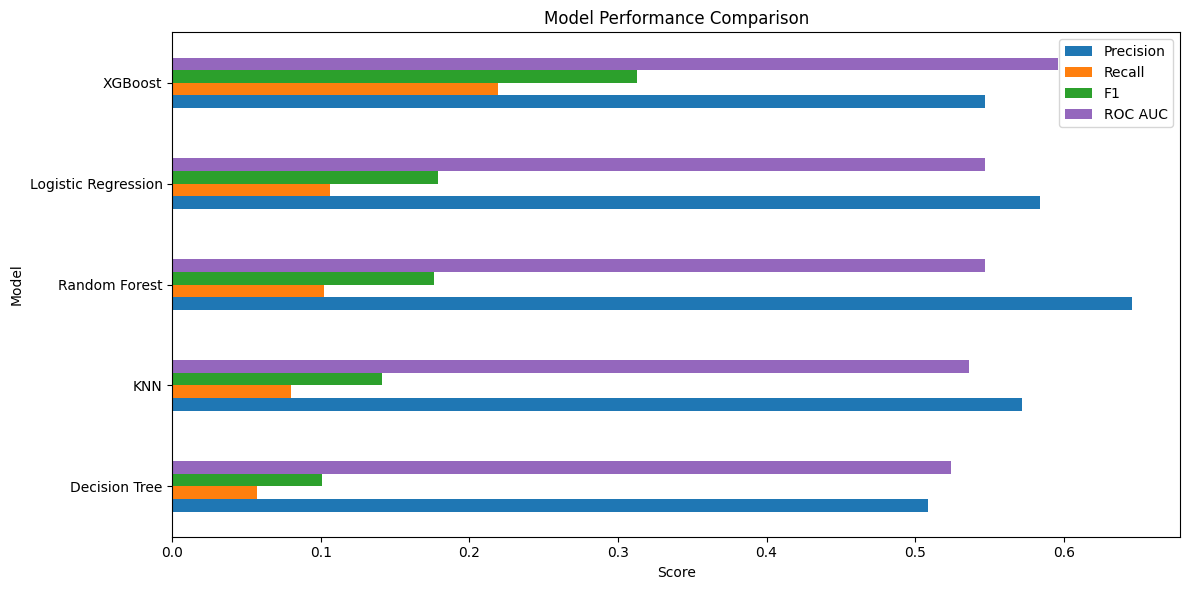

In [209]:
results_df_plot = results_df.copy()
metrics_to_plot = ['Precision', 'Recall', 'F1', 'ROC AUC']
results_df_plot[metrics_to_plot] = results_df_plot[metrics_to_plot].astype(float)

results_df_plot.sort_values('F1', ascending=True)[metrics_to_plot].plot(
    kind='barh', figsize=(12, 6),
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']
)
plt.title('Model Performance Comparison')
plt.xlabel('Score')
plt.tight_layout()
plt.show()

**Results Summary (Cross-Validation)**

| Model              | Precision | Recall | F1   | ROC AUC | Notes                                      |
|--------------------|-----------|--------|------|---------|--------------------------------------------|
| **XGBoost**        | High      | High   | **Best** | **Highest** | Best trade-off between sensitivity and precision |
| **Random Forest**  | Good      | Good   | High | High    | Slight tendency to overfit due to deep trees |
| **Logistic Reg.**  | High precision | Low recall | Lower F1 | Moderate | Conservative – misses many rain days       |
| **Decision Tree**  | Lower     | Moderate | Moderate | Lower  | Simpler, but less generalizable            |
| **KNN**            | Variable  | Lower  | Lower | Moderate | Slower and sensitive to feature scaling     |

**Interpretation**:
- **XGBoost** is the strongest performer. Its gradient boosting approach optimizes error iteratively, handling non-linearity and class imbalance well.
- **Random Forest** is also strong but less precise than XGBoost.
- **Logistic Regression** is fast and interpretable but struggles with recall (misses rain).
- **KNN and Decision Tree** underperform in both recall and AUC, indicating they are less suited to this problem.

### **8. Best Model Evaluation (XGBoost)**

In [210]:
# Re-split data for test evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

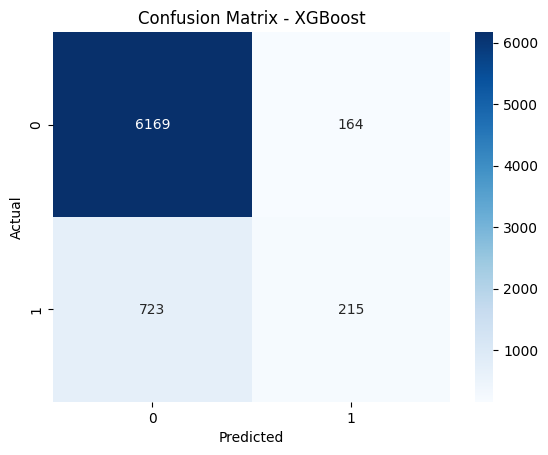

In [211]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Confusion Matrix**
The confusion matrix visualizes prediction results:

|                | Predicted No | Predicted Yes |
|----------------|--------------|----------------|
| **Actual No**  | TN           | FP             |
| **Actual Yes** | FN           | TP             |

From this, you can extract:
- **True Positives (TP)**: Rain correctly predicted as rain
- **False Negatives (FN)**: Rain days incorrectly predicted as no-rain (**most costly**)
- **False Positives (FP)**: False alarms
- **True Negatives (TN)**: No rain correctly predicted

**Why it matters**:
In rain prediction, **false negatives (missed rain events)** are typically worse than false positives. So a model with **high recall** (few FN) is preferred.

In [212]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6333
           1       0.57      0.23      0.33       938

    accuracy                           0.88      7271
   macro avg       0.73      0.60      0.63      7271
weighted avg       0.85      0.88      0.85      7271



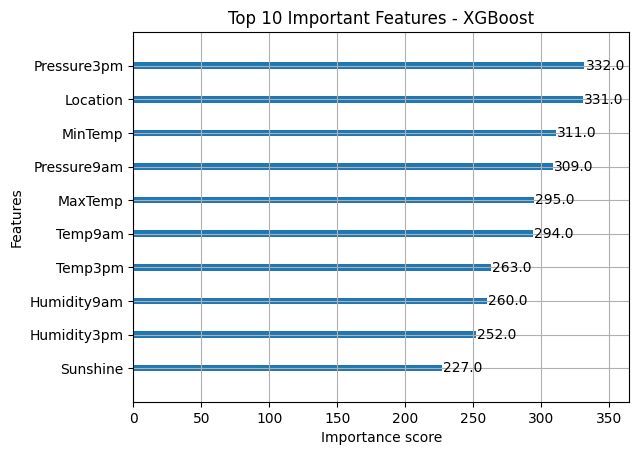

In [213]:
# Feature Importance
plot_importance(best_model, max_num_features=10)
plt.title('Top 10 Important Features - XGBoost')
plt.show()

**Feature Importance (XGBoost)**

The `plot_importance()` from XGBoost shows the **top features** that contribute most to model decisions.

**Why it's useful**:
- Helps identify which weather measurements are most predictive
- Can guide sensor prioritization or simplify the model by removing weak features

### **9. Creating Pipeline**

In [214]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from joblib import dump

# Create production-ready classification pipeline
final_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),       # Handle missing values
    ('scaler', StandardScaler()),                        # Standardize numeric features
    ('classifier', XGBClassifier(                        # Best performing model
        n_estimators=200,
        learning_rate=0.1,
        max_depth=4,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

# Fit pipeline to full training data
final_pipeline.fit(X, y)

# Export trained pipeline for deployment
dump(final_pipeline, 'rain_prediction_pipeline.joblib')

['rain_prediction_pipeline.joblib']